# Linear Programming
Linear programming is a method for optimization of a linear objective function. It is called linear because all of the constraints should be linear functions. It is mostly used in Operations Research and the goal is maximize the profit or getting lowest cost

Linear Programming have three core property:
- Linear Objective Function (maximize or minimize),
- Linear boundries conditions (constraints),
- Non-negative variables.

# Example Problem
Lets say we have a factory produce phone and tablet-pc. The production is almost similiar and they use the same production line for it. Each phone takes 60 minutes shell processing and 80 minutes assembly and test. Each tablet-pc takes 30 minutes shell processing and 120 minutes assembly and test. And on the production line there is 20 hours of shell processing and 40 hours of assembly available. Each phone is 700 dollars and each tablet-pc is 800 dollars. You have to find best combination for the maximize profit.

Now we have to determine the problem with mathematical formulas.
And don't forget to type converting. (hr -> min)

Objective function = $maximize: P = 700x + 800y$<br/>
                    Subject to: <br/>
                    $60x + 30y <= 1200$<br/>
                    $80x + 120y <= 2400$<br/> 
                    $x>= 0, y>= 0$

Now to solve this problem we need to import necessary library from scipy

In [23]:
from scipy.optimize import linprog

In scipy linprog() we only have minimize function but we can convert maximize problem to minimize problem and reach the solution.

In [24]:
obj = [-700, -800]

lhs = [[60, 30], [80, 120]] 

rhs = [1200, 2400]  

In [25]:
bnd = [(0, float('inf')), (0, float('inf'))] #boundary of the decision variables

In [26]:
optimization = linprog(c = obj, A_ub = lhs, b_ub = rhs, bounds = bnd, method = 'simplex')

optimization

     con: array([], dtype=float64)
     fun: -18500.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([15., 10.])

So this problem is solved by simplex method and the message says" Optimization terminated successfully". Our function is -18.500 and nit represents n-iterations for this problem which is 2. There is no slack values in the problem and it says x array([15, 10]). In our problem x is representing phone and y is tablet-pc. The solution says we should product <b>15</b> phones and <b color=#baba12>10</b> tablet-pc's to reach the maximum outcome. Which is <b>18.500 dollars</b> in this case.

### Graph Solution for the problem
We can also solve linear programming problems with using graphs. For the solution we draw every constraint on the coordinate system. And this problem is a maximization problem we fill inside. If this problem was a minimizing problem we fill the outside of the lines.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

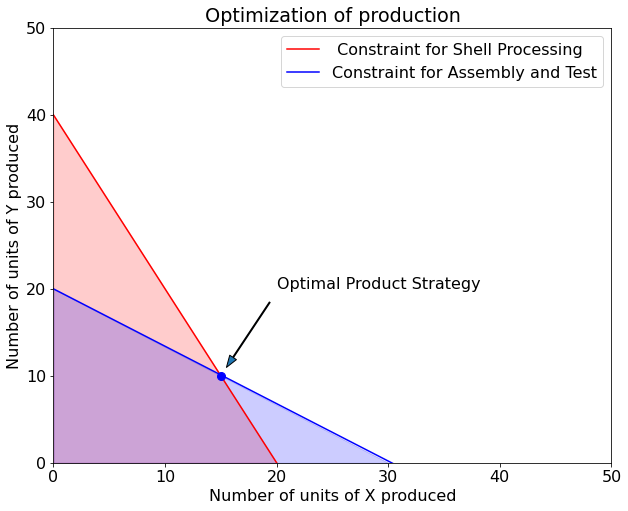

In [28]:
plt.figure(figsize = (10, 8))
plt.rcParams["font.size"] = 16
plt.axis([0, 50, 0, 50])

# First Constraint
x = np.array([0, 50]); y = 40 - 2*x
plt.plot(x, y, "red", label= " Constraint for Shell Processing")
plt.fill_between([0, 20], [40, 0], color="red", alpha=0.2)

# Second Constraint
x = np.array([0, 50]); y = 20 - 0.66*x
plt.plot(x, y, "blue", label="Constraint for Assembly and Test")
plt.fill_between([0, 30], [20, 0], color="blue", alpha=0.2)

# Optimal production indicator
plt.plot(15, 10, marker = "o", color= "blue", markersize = 8) 
plt.annotate("Optimal Product Strategy", xy = (15, 10), xytext = (20, 20),
            arrowprops = dict(shrink =.1, width= 1, headwidth= 8))

plt.xlabel("Number of units of X produced")
plt.ylabel("Number of units of Y produced")
plt.title("Optimization of production")
plt.legend()
plt.show()